In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [34]:
!git clone 'https://github.com/rheadoshi/PRML'
dataset = pd.read_csv('/content/PRML/healthcare-dataset-stroke-data.csv')
dataset.head()

fatal: destination path 'PRML' already exists and is not an empty directory.


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Visualisation

In [35]:
dataset.shape

(5110, 12)

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


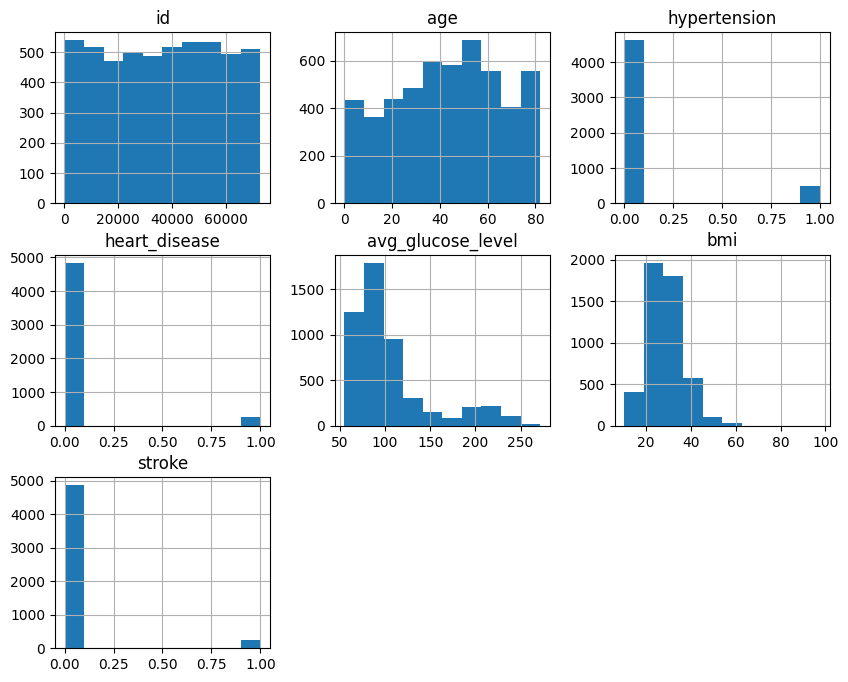

In [37]:
dataset.hist(figsize=(10, 8))
plt.show()

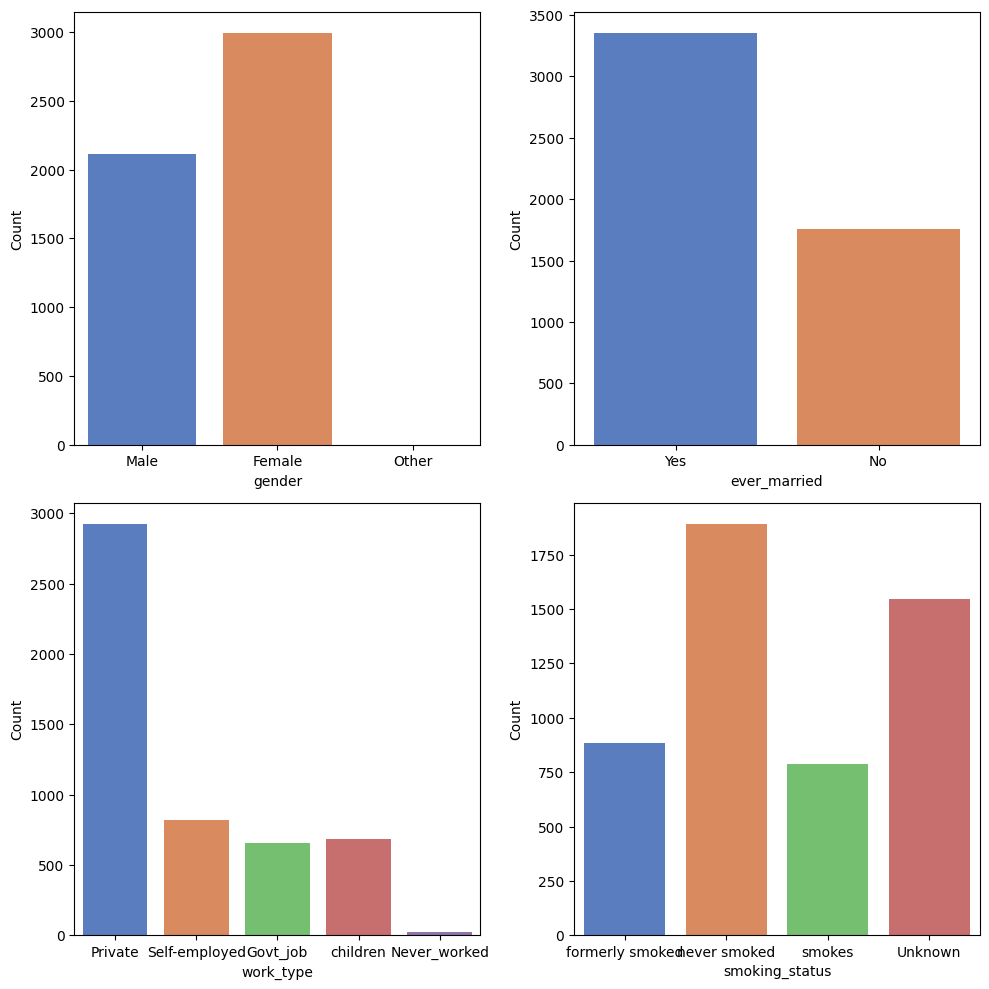

In [38]:
plt.figure(figsize=(10,10))
plotnumber = 1
columns = ['gender', 'ever_married','work_type','smoking_status']

for col in columns:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.countplot(x=col, data=dataset, palette='muted')
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Count', fontsize=10)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

# Data Pre-Processing

Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
cols = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status','stroke']
le = LabelEncoder()
for col in cols:
    dataset.loc[:,col] = le.fit_transform(dataset.loc[:,col])
    dataset[col] = dataset[col].astype(int)
dataset=dataset.drop(columns=['id'])
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


We can see some data is missing for bmi feature. So to fill in the that data, we can find average value of bmi grouping them by gender and age.  


In [41]:
# Creating a new column 'Age_class' based on age ranges
dataset['Age_class'] = dataset['age'].apply(lambda x: 1 if x < 25 else (2 if x < 50 else 3))


In [42]:
print((dataset.groupby(['gender', 'Age_class'])['bmi'].agg(['mean'])))

                       mean
gender Age_class           
0      1          23.714660
       2          30.653965
       3          30.568066
1      1          22.603565
       2          31.305913
       3          30.776571
2      2          22.400000


In [43]:
dataset["bmi"] = dataset["bmi"].fillna(-1)
for i in range(dataset.shape[0]):
  if dataset.loc[i,'bmi']==-1:
    if dataset.loc[i,'Age_class']==1:
      if dataset.loc[i,'gender']==0:
        dataset.loc[i,'bmi']=23.71
      else:
        dataset.loc[i,'bmi']=22.60
    elif dataset.loc[i,'Age_class']==3:
      if dataset.loc[i,'gender']==0:
        dataset.loc[i,'bmi']=30.57
      else:
        dataset.loc[i,'bmi']=30.78
    else:
      if dataset.loc[i,'gender']==0:
        dataset.loc[i,'bmi']=30.65
      elif dataset.loc[i,'gender']==1:
        dataset.loc[i,'bmi']=31.31
      else:
        dataset.loc[i,'bmi']=22.4

In [44]:
dataset.drop(columns=['Age_class'],inplace = True)
print(((dataset.isna().sum())/dataset.shape[0])*100)


gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64


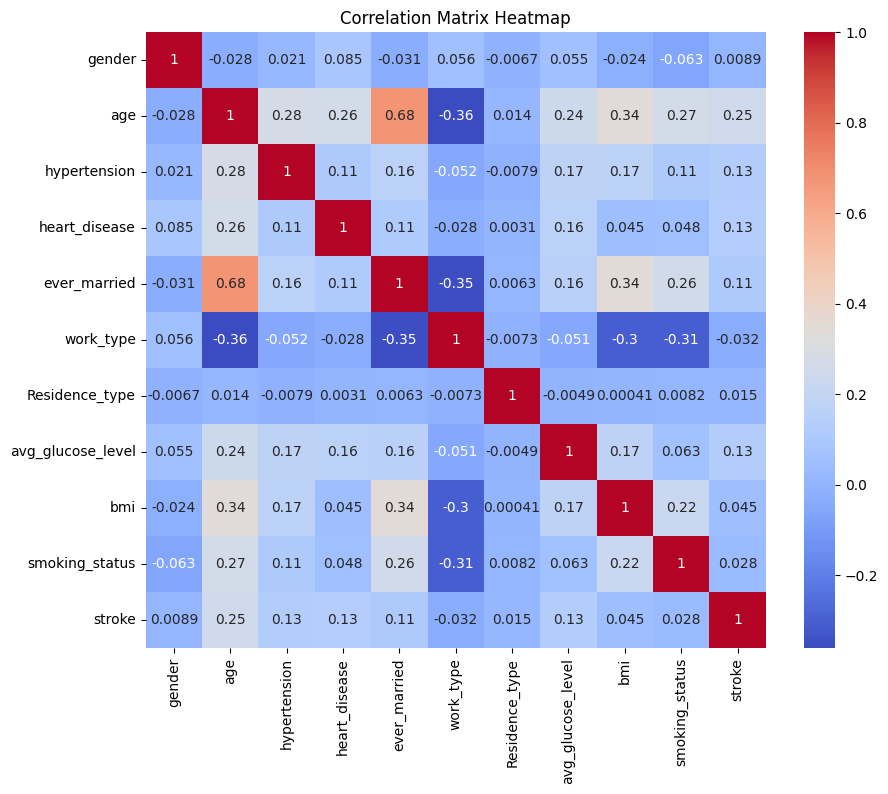

In [45]:
plt.figure(figsize=(10, 8))
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()